In [2]:
# Access astronomical databases
from pyvo import registry  # version >=1.6

# Moc and HEALPix tools
from mocpy import MOC

# Coordinates manipulation
from astropy.coordinates import SkyCoord

# Sky visualization
from ipyaladin import Aladin  # version >=0.4.0

# For plots
import matplotlib.pyplot as plt


# Welcome to VizieR example workflow

[![Vizier](https://custom-icon-badges.demolab.com/badge/Vizier-gray.svg?logo=vizier&logoColor=orange&logoWidth=20)](https://vizier.cds.unistra.fr/viz-bin/VizieR "https://vizier.cds.unistra.fr/viz-bin/VizieR")

**Notes:** 

It is a generic notebook, highlighting what can be done once you chose a catalog. This workflow is suggested by [CDS](https://cdsweb.unistra.fr/) (Strasbourg Astronomical Data Center, house of [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR)).

The notebook exploits [pyVO](https://pyvo.readthedocs.io/en/latest/), an advanced library  of The [Virtual Observatory](https://ivoa.net/).

[Astroquery](https://astroquery.readthedocs.io/en/latest/vizier/vizier.html) (not used here) is a well-documented, user-friendly alternative.

--------------------------------------------------------

## 1. Setup

This example notebook has the following dependencies: 

**Required**
- pyvo : this library facilitates the access to the Virtual Observatory (VO) resources. VizieR is part of the VO.
This notebook needs version >=1.4.1
**Optional, for visualization**
- ipyaladin : this is the Aladin-lite sky viewer, bundled as a jupyter widget. It allows to plot catalogs and multi-order coverages (MOC)
- matplotlib : an other option to see catalog points and MOCs

## 2. Metadata exploration with the Virtual Observatory registry

This part uses [pyvo](https://pyvo.readthedocs.io/en) to connect to the VO registry.

In [3]:
# the catalogue name in VizieR
CATALOGUE = "J/ApJS/229/39"

We first retrieve the catalogue information.

In [4]:
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

In [5]:
# We can print metadata information about the catalogue
voresource.describe(verbose=True)

Narrow line Seyfert 1 galaxies from SDSS-DR12
Short Name: J/ApJS/229/39
IVOA Identifier: ivo://cds.vizier/j/apjs/229/39
Access modes: conesearch, tap#aux, web
- tap#aux: https://tapvizier.cds.unistra.fr/TAPVizieR/tap
- webpage: https://vizier.cds.unistra.fr/viz-bin/VizieR-2?-source=J/ApJS/229/39
- conesearch: https://vizier.cds.unistra.fr/viz-
 bin/conesearch/J/ApJS/229/39/table1?, description: Cone search capability for
 table J/ApJS/229/39/table1 (Emission line properties of narrow-line Seyfert 1
 (NLSy1) galaxies)

We present a new catalog of narrow-line Seyfert 1 (NLSy1) galaxies from the
Sloan Digital Sky Survey Data Release 12 (SDSS DR12). This was obtained by a
systematic analysis through modeling of the continuum and emission lines of
the spectra of all the 68859 SDSS-DR12 objects that are classified as "QSO" by
the SDSS spectroscopic pipeline with z<0.8 and a median signal-to-noise ratio
(S/N)>2/pixel. This catalog contains a total of 11101 objects, which is about
5 times larg

We can also inspect in details the `resource` object and access the attributes not provided by the describe method. See for example, the first author of a resource: 

In [6]:
voresource.creators[0]

'Rakshit S.'

## 3. Access the tabular data of this catalog

We can have a look at the tables available in the catalogue.

In [7]:
tables = voresource.get_tables()
print(f"In this catalogue, we have {len(tables)} tables.")
for table_name, table in tables.items():
    print(f"{table_name}: {table.description}")

In this catalogue, we have 1 tables.
J/ApJS/229/39/table1: Emission line properties of narrow-line Seyfert 1 (NLSy1) galaxies


In [9]:
# We can also extract the tables names for later use
tables_names = list(tables.keys())
tables_names

['J/ApJS/229/39/table1']

The actual data can then be accessed using any of the ``access_modes`` of the voresource.

In [10]:
voresource.access_modes()

{'conesearch', 'tap#aux', 'web'}

The web access is found by following the ``reference_url``

In [11]:
voresource.reference_url

'https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJS/229/39'

### 3.1 Execute a SQL/ADQL query

The ``tap#aux`` in the ``access_mode`` response indicates that we can also do a SQL/ADQL query for these VizieR tables.

On the first table of the catalogue, we execute an <a href='https://www.ivoa.net/documents/latest/ADQL.html'>ADQL</a> query.

In [12]:
# get the first table of the catalogue
first_table_name = tables_names[0]

# execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = tap_service.search(
    f'select TOP 10 * from "{first_table_name}"',
)
tap_records

<DALResultsTable length=10>
recno      Sp-ID      RAJ2000  ... e_FWHMHab  R4570            SDSS          
                        deg    ...   km / s                                  
int32      object     float64  ...   int16   float64          object         
----- --------------- -------- ... --------- ------- ------------------------
 3845 1067-52616-0397 44.96386 ...        --    0.28 SDSS J025951.31+003745.5
 3785 0411-51817-0372 45.13046 ...        24    0.64 SDSS J030031.31+005357.2
 8030 0411-51817-0337 44.79524 ...       113    0.22 SDSS J025910.85+005503.6
 6534 0709-52205-0607 46.17204 ...       115    1.39 SDSS J030441.28+011052.4
 1487 0708-52175-0610 44.46742 ...        --    0.65 SDSS J025752.17+005311.2
 5998 1068-52614-0563 44.44698 ...        --    1.38 SDSS J025747.28+010533.1
 7252 4257-55480-0073 44.69976 ...        --    0.44 SDSS J025847.94+020204.9
 2285 4257-55480-0727  43.7679 ...        --    1.21 SDSS J025504.29+022344.3
 4277 4257-55480-0568  43.0446 ...  

<!-- section position -->

We will explore the other access modes here.

### 3.2. Execute a cone search query

We use the Simple Cone Search (<a href='https://www.ivoa.net/documents/latest/ConeSearch.html'>SCS</a>) protocol of the virtual observatory (only available for tables with positions).

Finding the conesearch service that you want to use (there is usually one per table):

Let's use the first one for this example. 

In [13]:
# we get the conesearch  service associated to the first table
conesearch_interface = voresource.get_interface(service_type='conesearch', 
                                                keyword='J/ApJS/229/39/table1',
                                                lax=True)
# if you get a TypeError about an unexpected keyword, check that you installed pyvo>=1.6
conesearch_service = conesearch_interface.to_service()

We adapt the radius and position of the center to our needs:

In [14]:
conesearch_radius = 1 / 60.0  # in degrees
conesearch_center = (44.978027, 0.634146)

In [15]:
conesearch_records = conesearch_service.search(
    pos=conesearch_center,
    sr=conesearch_radius,
)
conesearch_records

<DALResultsTable length=1>
   _r    recno      Sp-ID       RAJ2000  ...           SDSS            Sp  NED 
                                  deg    ...                                   
float64  int32      str15       float64  ...          str24           str2 str3
-------- ----- --------------- --------- ... ------------------------ ---- ----
0.014966  3845 1067-52616-0397  44.96386 ... SDSS J025951.31+003745.5   Sp  NED

## 4. Get the catalogue coverage

VizieR also provides the coverage of each catalogue with Multiple Order Coverage (<a href='https://ivoa.net/documents/MOC/'>MOC</a>) at order 10 -- meaning with a 0.001 rad spacial resolution.

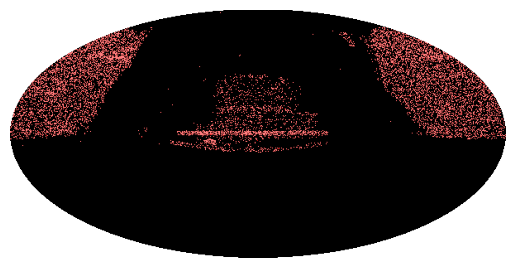

In [16]:
# retrieve the MOC
catalogue_coverage = MOC.from_vizier_table(CATALOGUE)
catalogue_coverage.display_preview()

The quick preview is the whole sky in equatorial coordinates. Red represent zones where the catalog has data, black areas are empty zones.

We can also plot the coverage with ``matplotlib``.

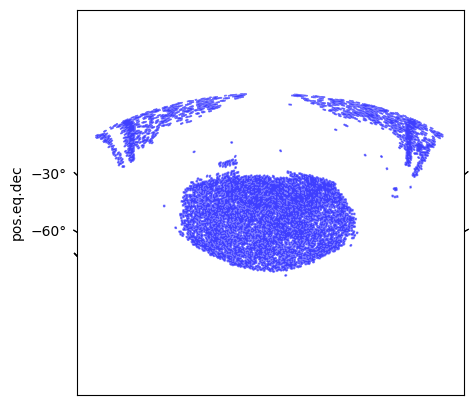

In [17]:
fig = plt.figure(figsize=(5, 5))
wcs = catalogue_coverage.wcs(fig)
ax = fig.add_subplot(projection=wcs)
catalogue_coverage.fill(ax=ax, wcs=wcs, alpha=0.5, color="blue")

or with [ipyaladin](https://github.com/cds-astro/ipyaladin)

In [18]:
aladin = Aladin()
aladin

Aladin()

We switch the target to the center of the conesearch

In [ ]:
aladin.target = "44.978027 +0.634146"

We can add the tables and coverage in this ipyaladin widget:

In [ ]:
aladin.add_table(conesearch_records.to_table(), color="lightskyblue", shape="plus")

If you don't see the points from the conesearch result, try zooming in the widget with your mouse wheel.

We can also add the result of the TAP query:

In [ ]:
aladin.add_table(tap_records.to_table())

In [ ]:
aladin.add_moc(
    catalogue_coverage,
    fill=True, opacity=0.5, color="pink", edge=True
)

For more information about manipulating multi-order coverages, see [MOCpy documentation](https://cds-astro.github.io/mocpy/), and about using the `ipyaladin` widget, see [its documentation](https://cds-astro.github.io/ipyaladin/).